## <span style="color:red; font-weight:bold">Importing the libraries</span> 

In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN

## <span style="color:red; font-weight:bold">Load and Prepare Data</span> 

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')

In [7]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## <span style="color:red; font-weight:bold">EDA</span> 

In [10]:
dataset.sample(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,117,Female,63,65,43
59,60,Male,53,46,46
151,152,Male,39,78,88
125,126,Female,31,70,77


In [11]:
dataset['Gender']=dataset['Gender'].map({'Male':1,'Female':0})

In [12]:
dataset.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,1,18,33,92
107,108,1,54,63,46
186,187,0,54,101,24
114,115,0,18,65,48
180,181,0,37,97,32


In [13]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [15]:
dataset.sample(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
127,128,1,40,71,95


In [16]:
df = dataset.drop(['CustomerID', 'Gender'],axis=1)

In [17]:
pd.DataFrame({'Min': df.min(),'Max': df.max(),'Median': df.median() ,'Mean': df.mean()})

,Min,Max,Median,Mean
Age,18,70,36.0,38.85
Annual Income (k$),15,137,61.5,60.56
Spending Score (1-100),1,99,50.0,50.20


## <span style="color:red; font-weight:bold">Data Preprocessing for K-means</span> 

In [19]:
X1 = dataset.iloc[:, [3, 4]].values

In [20]:
X1[0:3]

array([[15, 39],
       [15, 81],
       [16,  6]], dtype=int64)

In [21]:
wcss = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans1.fit(X1)
    wcss.append(kmeans1.inertia_)

In [22]:
wcss[0:4]

[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195]

In [23]:
k = 1
_ = list(map(lambda a: print(f'For K = {k+a} , J: {wcss[a]} Dis = {round(abs(wcss[a] - (wcss[a-1] if a > 0 else 0)))}'), range(len(wcss))))

For K = 1 , J: 269981.28 Dis = 269981
For K = 2 , J: 183653.3289473684 Dis = 86328
For K = 3 , J: 106348.37306211119 Dis = 77305
For K = 4 , J: 73880.64496247195 Dis = 32468
For K = 5 , J: 44448.45544793371 Dis = 29432
For K = 6 , J: 40825.16946386946 Dis = 3623
For K = 7 , J: 33642.579220779226 Dis = 7183
For K = 8 , J: 26686.83778518778 Dis = 6956
For K = 9 , J: 24766.471609793443 Dis = 1920
For K = 10 , J: 23103.122085983916 Dis = 1663


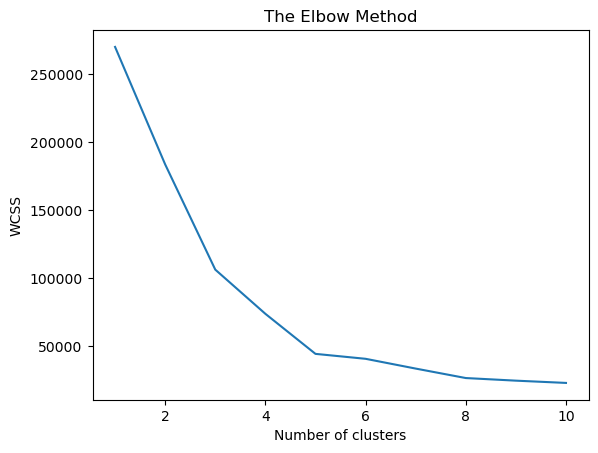

In [24]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X1)

In [26]:
kmeans1.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

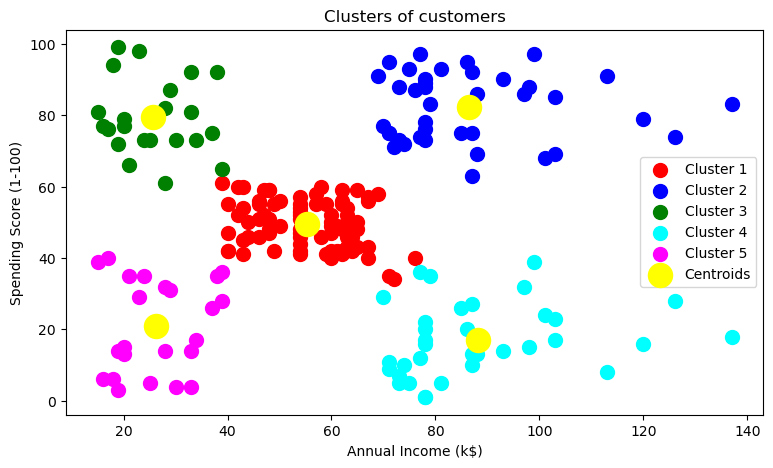

In [27]:
plt.figure(figsize=(9, 5))
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X1[y_kmeans1 == 4, 0], X1[y_kmeans1 == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## <span style="color:red; font-weight:bold">PCA for K-means</span> 

In [29]:
X2 = dataset.iloc[:, [2, 3, 4]].values

In [30]:
X2[0:3]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6]], dtype=int64)

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2)

In [32]:
wcss = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans2.fit(X_pca)
    wcss.append(kmeans2.inertia_)

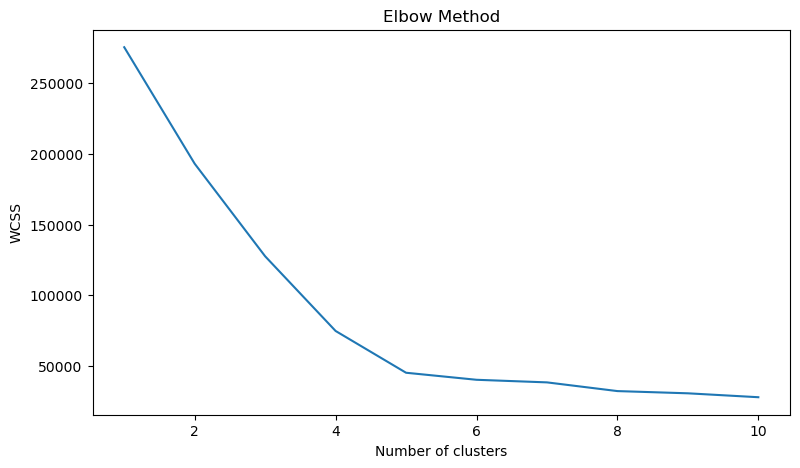

In [33]:
plt.figure(figsize=(9, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans2 = kmeans2.fit_predict(X_pca)

In [35]:
kmeans2.cluster_centers_

array([[ -4.41034605,  -3.10054946],
       [ 41.55109062,   1.86988377],
       [  4.98429835, -46.67348852],
       [-10.22346234,  42.33151065],
       [-44.38700009, -10.04934895]])

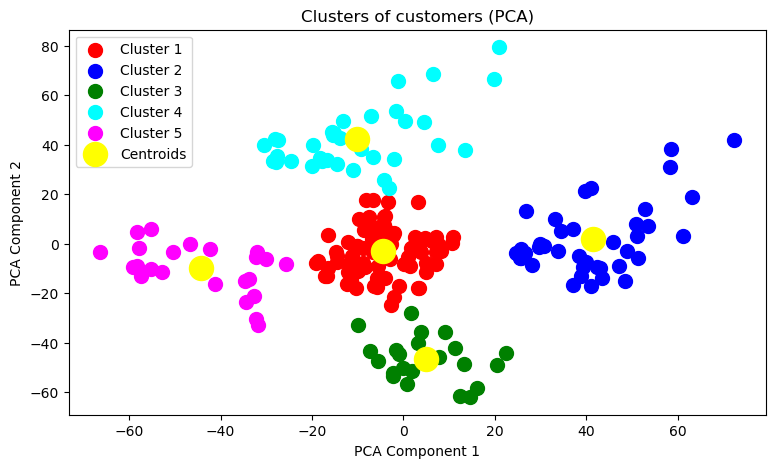

In [36]:
plt.figure(figsize=(9, 5))
plt.scatter(X_pca[y_kmeans2 == 0, 0], X_pca[y_kmeans2 == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans2 == 1, 0], X_pca[y_kmeans2 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans2 == 2, 0], X_pca[y_kmeans2 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_kmeans2 == 3, 0], X_pca[y_kmeans2 == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_pca[y_kmeans2 == 4, 0], X_pca[y_kmeans2 == 4, 1], s=100, c='magenta', label='Cluster 5')

centroids2 = kmeans2.cluster_centers_
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

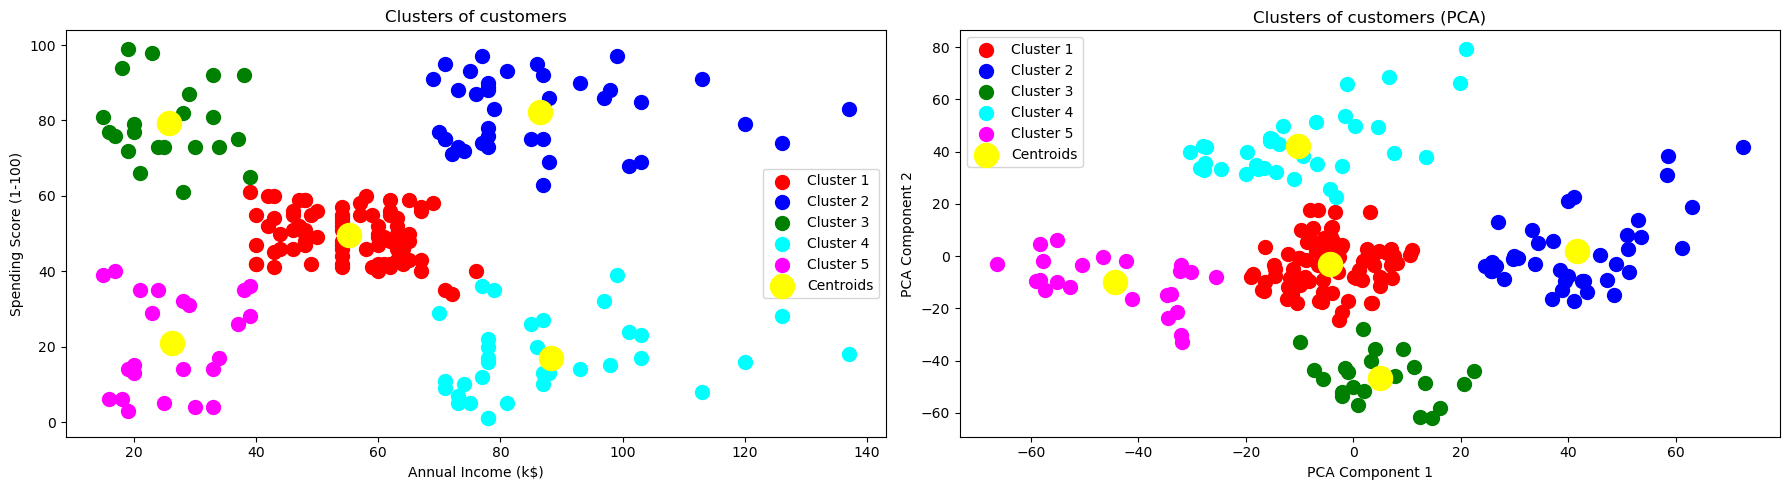

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s=100, c='red', label='Cluster 1')
axs[0].scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s=100, c='blue', label='Cluster 2')
axs[0].scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s=100, c='green', label='Cluster 3')
axs[0].scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s=100, c='cyan', label='Cluster 4')
axs[0].scatter(X1[y_kmeans1 == 4, 0], X1[y_kmeans1 == 4, 1], s=100, c='magenta', label='Cluster 5')
axs[0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
axs[0].set_title('Clusters of customers')
axs[0].set_xlabel('Annual Income (k$)')
axs[0].set_ylabel('Spending Score (1-100)')
axs[0].legend()

axs[1].scatter(X_pca[y_kmeans2 == 0, 0], X_pca[y_kmeans2 == 0, 1], s=100, c='red', label='Cluster 1')
axs[1].scatter(X_pca[y_kmeans2 == 1, 0], X_pca[y_kmeans2 == 1, 1], s=100, c='blue', label='Cluster 2')
axs[1].scatter(X_pca[y_kmeans2 == 2, 0], X_pca[y_kmeans2 == 2, 1], s=100, c='green', label='Cluster 3')
axs[1].scatter(X_pca[y_kmeans2 == 3, 0], X_pca[y_kmeans2 == 3, 1], s=100, c='cyan', label='Cluster 4')
axs[1].scatter(X_pca[y_kmeans2 == 4, 0], X_pca[y_kmeans2 == 4, 1], s=100, c='magenta', label='Cluster 5')
centroids2 = kmeans2.cluster_centers_
axs[1].scatter(centroids2[:, 0], centroids2[:, 1], s=300, c='yellow', label='Centroids')

axs[1].set_title('Clusters of customers (PCA)')
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 2')
axs[1].legend()

plt.tight_layout()
plt.show()

## <span style="color:red; font-weight:bold">DBSCAN</span> 

In [39]:
X3 = dataset.iloc[:, [3, 4]].values

In [40]:
dbscan3 = DBSCAN(eps=9, min_samples=5)
y_dbscan3 = dbscan3.fit_predict(X3)

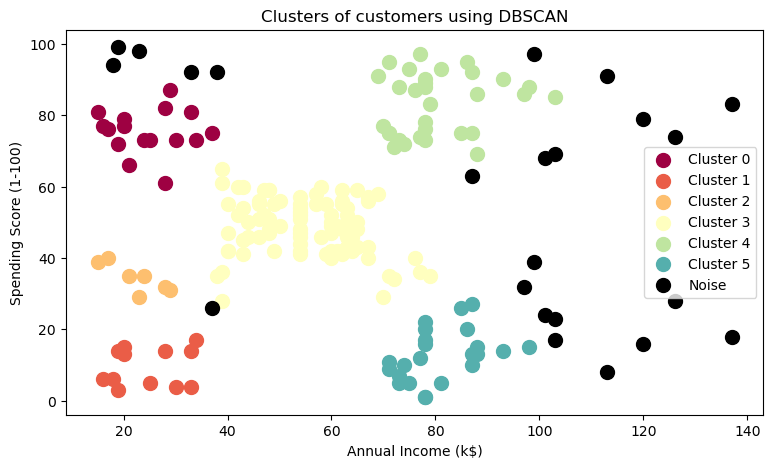

In [41]:
plt.figure(figsize=(9, 5))
unique_labels = set(y_dbscan3)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))
for k in unique_labels:
    color = 'k' if k == -1 else colors(k)   
    plt.scatter(X3[y_dbscan3 == k, 0], X3[y_dbscan3 == k, 1], s=100, c=color, label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('Clusters of customers using DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## <span style="color:red; font-weight:bold">PCA for DBSCAN</span> 

In [43]:
X4 = dataset.iloc[:, [2, 3, 4]].values

In [44]:
pca2 = PCA(n_components=2)
X4 = pca2.fit_transform(X4)

In [45]:
dbscan4 = DBSCAN(eps=9, min_samples=5)
y_dbscan4 = dbscan4.fit_predict(X4)

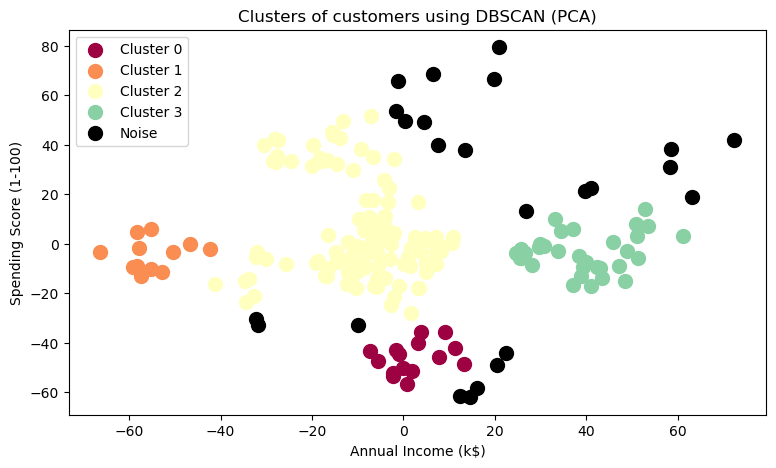

In [46]:
plt.figure(figsize=(9, 5))
unique_labels = set(y_dbscan4)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))
for k in unique_labels:
    color = 'k' if k == -1 else colors(k)    
    plt.scatter(X4[y_dbscan4 == k, 0], X4[y_dbscan4 == k, 1], s=100, c=color, label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('Clusters of customers using DBSCAN (PCA)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

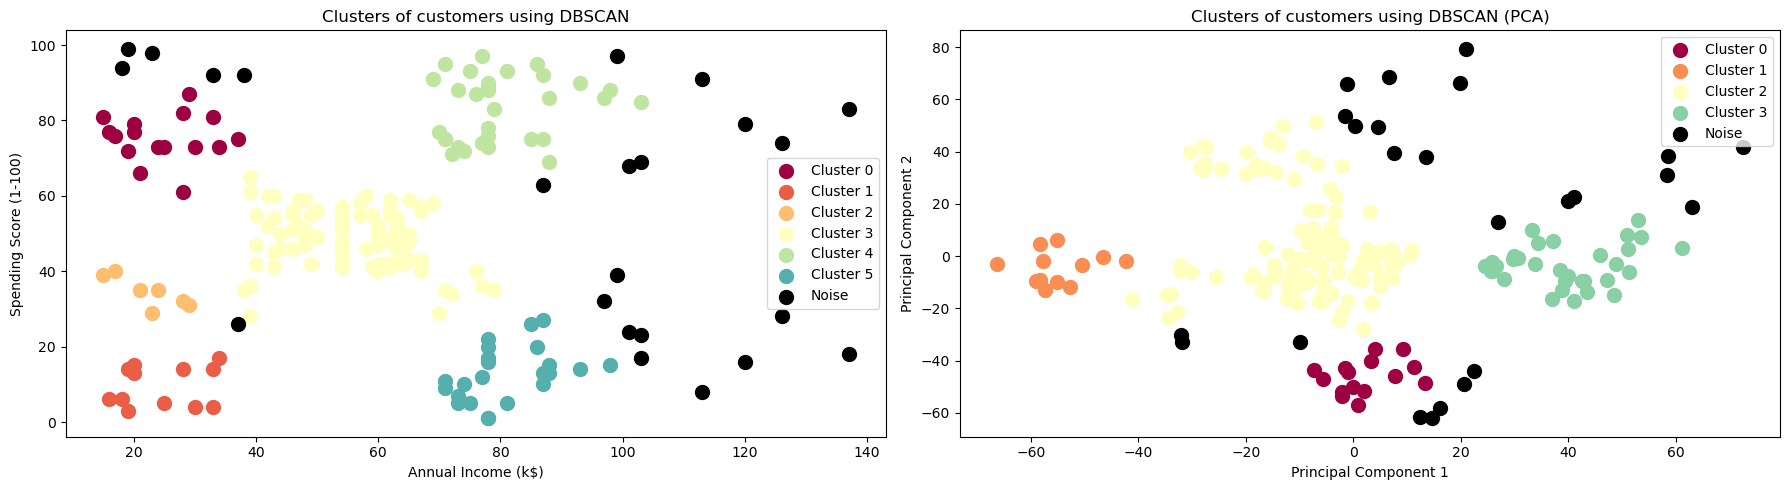

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

unique_labels = set(y_dbscan3)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))
for k in unique_labels:
    color = 'k' if k == -1 else colors(k)   
    axs[0].scatter(X3[y_dbscan3 == k, 0], X3[y_dbscan3 == k, 1], s=100, c=color, label=f'Cluster {k}' if k != -1 else 'Noise')
axs[0].set_title('Clusters of customers using DBSCAN')
axs[0].set_xlabel('Annual Income (k$)')
axs[0].set_ylabel('Spending Score (1-100)')
axs[0].legend()


unique_labels = set(y_dbscan4)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))
for k in unique_labels:
    color = 'k' if k == -1 else colors(k)    
    axs[1].scatter(X4[y_dbscan4 == k, 0], X4[y_dbscan4 == k, 1], s=100, c=color, label=f'Cluster {k}' if k != -1 else 'Noise')
axs[1].set_title('Clusters of customers using DBSCAN (PCA)')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()


plt.tight_layout()
plt.show()

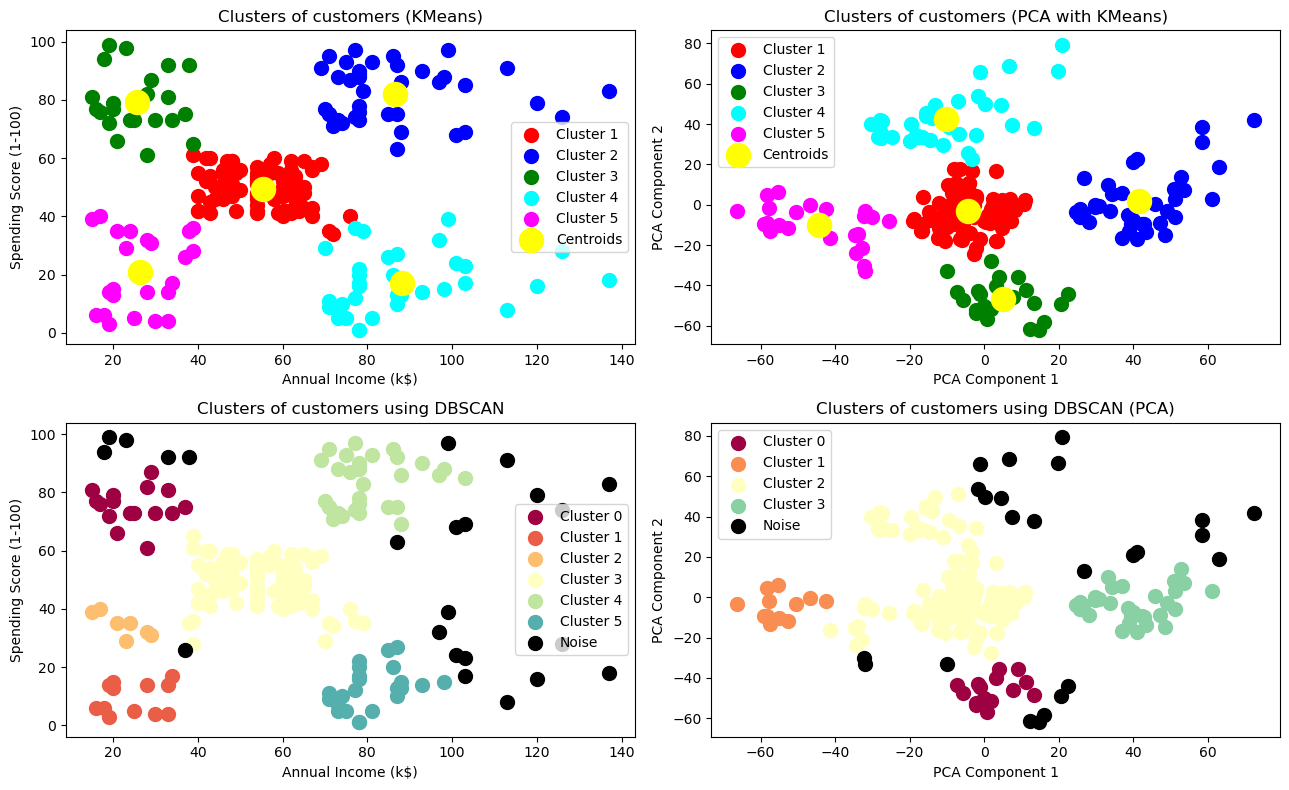

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(13, 8))

axs[0, 0].scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s=100, c='red', label='Cluster 1')
axs[0, 0].scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s=100, c='blue', label='Cluster 2')
axs[0, 0].scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s=100, c='green', label='Cluster 3')
axs[0, 0].scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s=100, c='cyan', label='Cluster 4')
axs[0, 0].scatter(X1[y_kmeans1 == 4, 0], X1[y_kmeans1 == 4, 1], s=100, c='magenta', label='Cluster 5')
axs[0, 0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
axs[0, 0].set_title('Clusters of customers (KMeans)')
axs[0, 0].set_xlabel('Annual Income (k$)')
axs[0, 0].set_ylabel('Spending Score (1-100)')
axs[0, 0].legend()

axs[0, 1].scatter(X_pca[y_kmeans2 == 0, 0], X_pca[y_kmeans2 == 0, 1], s=100, c='red', label='Cluster 1')
axs[0, 1].scatter(X_pca[y_kmeans2 == 1, 0], X_pca[y_kmeans2 == 1, 1], s=100, c='blue', label='Cluster 2')
axs[0, 1].scatter(X_pca[y_kmeans2 == 2, 0], X_pca[y_kmeans2 == 2, 1], s=100, c='green', label='Cluster 3')
axs[0, 1].scatter(X_pca[y_kmeans2 == 3, 0], X_pca[y_kmeans2 == 3, 1], s=100, c='cyan', label='Cluster 4')
axs[0, 1].scatter(X_pca[y_kmeans2 == 4, 0], X_pca[y_kmeans2 == 4, 1], s=100, c='magenta', label='Cluster 5')
centroids2 = kmeans2.cluster_centers_
axs[0, 1].scatter(centroids2[:, 0], centroids2[:, 1], s=300, c='yellow', label='Centroids')
axs[0, 1].set_title('Clusters of customers (PCA with KMeans)')
axs[0, 1].set_xlabel('PCA Component 1')
axs[0, 1].set_ylabel('PCA Component 2')
axs[0, 1].legend()

unique_labels = set(y_dbscan3)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))
for k in unique_labels:
    color = 'k' if k == -1 else colors(k)   
    axs[1, 0].scatter(X3[y_dbscan3 == k, 0], X3[y_dbscan3 == k, 1], s=100, c=color, label=f'Cluster {k}' if k != -1 else 'Noise')
axs[1, 0].set_title('Clusters of customers using DBSCAN')
axs[1, 0].set_xlabel('Annual Income (k$)')
axs[1, 0].set_ylabel('Spending Score (1-100)')
axs[1, 0].legend()

unique_labels = set(y_dbscan4)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))
for k in unique_labels:
    color = 'k' if k == -1 else colors(k)    
    axs[1, 1].scatter(X4[y_dbscan4 == k, 0], X4[y_dbscan4 == k, 1], s=100, c=color, label=f'Cluster {k}' if k != -1 else 'Noise')
axs[1, 1].set_title('Clusters of customers using DBSCAN (PCA)')
axs[1, 1].set_xlabel('PCA Component 1')
axs[1, 1].set_ylabel('PCA Component 2')
axs[1, 1].legend()

plt.tight_layout()
plt.show()